In [1]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA
from PCHA import PCHA
from scipy.spatial import procrustes
import NMF as nmf
from sklearn.manifold import MDS

In [2]:
# load mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/mnist', one_hot=False)
data = mnist.train.images
data = (data * 2) - 1 # norm for tanh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# pick single digit
digit = 4
idx_digit = mnist.train.labels == digit
data = data[idx_digit,]

In [4]:
# AAnet params
num_at = 4
noise_z_std = 0.05
z_dim = [256,64]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [5]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [6]:
# train
model.train(data, batch_size=128, num_batches=5000)

Iter [       0] Time [0.3687] loss [3.8699]
Iter [     500] Time [2.3274] loss [0.1488]
Iter [    1000] Time [4.3520] loss [0.1335]
Iter [    1500] Time [6.4016] loss [0.1246]
Iter [    2000] Time [8.4058] loss [0.1204]
Iter [    2500] Time [10.3839] loss [0.1221]
Iter [    3000] Time [12.3817] loss [0.1183]
Iter [    3500] Time [14.3634] loss [0.1163]
Iter [    4000] Time [16.2936] loss [0.1139]
Iter [    4500] Time [18.3006] loss [0.1135]
Iter [    4999] Time [20.3297] loss [0.1131]
done.


In [7]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.1119


In [8]:
ats_x = model.get_ats_x()

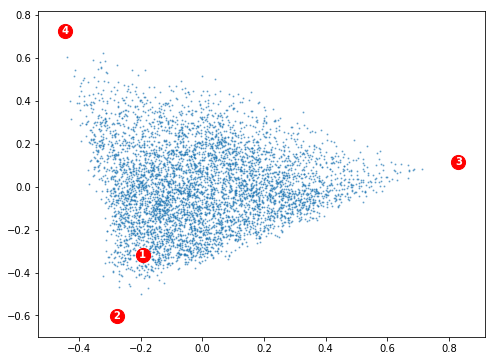

In [9]:
pca = PCA(n_components=2)
Z_at = np.eye(num_at)
samples_Z = model.data2at(data)
Y_pca_z = pca.fit_transform(samples_Z)
Y_pca = pca.transform(Z_at)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca_z[:,0], Y_pca_z[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=200, c='r')
for i in range(Y_pca.shape[0]):
    plt.text(Y_pca[i,0], Y_pca[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

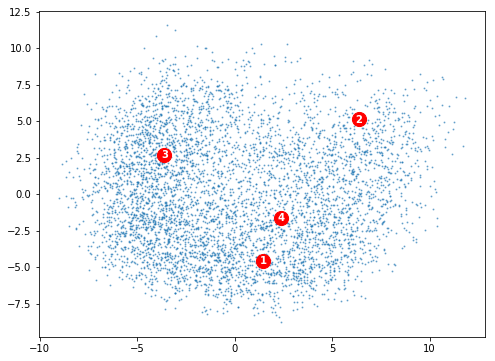

In [10]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(ats_x)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

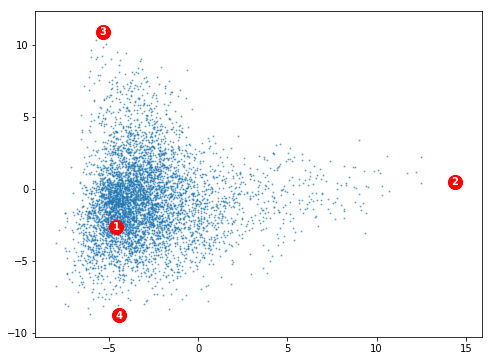

In [11]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(ats_x)
Y_pca = pca.transform(data)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

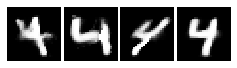

In [12]:
# plot ATs
ats_x = model.get_ats_x()
AAtools.plot_mnist(ats_x)

In [13]:
# sample uniform from simplex
at_sample_uniform = model.sample_at_uniform(5000)
data_sample_uniform = model.at2data(at_sample_uniform)

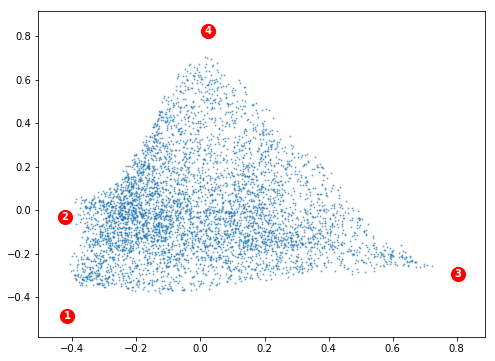

In [14]:
pca = PCA(n_components=2)
Z_at = np.eye(num_at)
samples_Z = model.data2at(data_sample_uniform)
Y_pca_z = pca.fit_transform(samples_Z)
Y_pca = pca.transform(Z_at)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca_z[:,0], Y_pca_z[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=200, c='r')
for i in range(Y_pca.shape[0]):
    plt.text(Y_pca[i,0], Y_pca[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

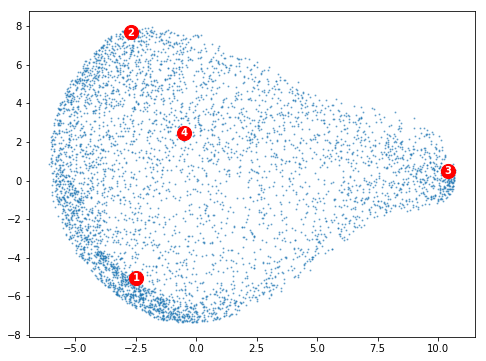

In [225]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data_sample_uniform)
Y_pca_at = pca.transform(ats_x)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

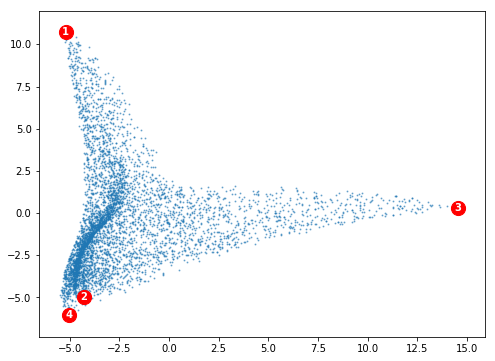

In [226]:
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(ats_x)
Y_pca = pca.transform(data_sample_uniform)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

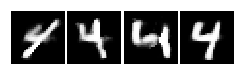

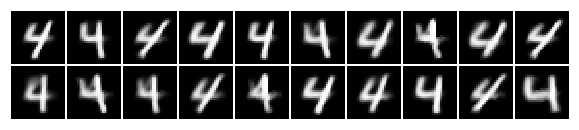

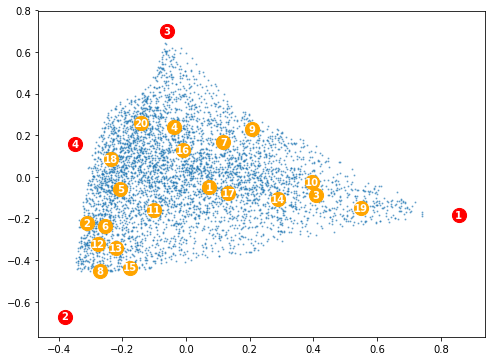

In [227]:
# plot ATs
ats_x = model.get_ats_x()
AAtools.plot_mnist(ats_x)
# samples
at_sample_uniform = model.sample_at_uniform(20)
data_sample_uniform2 = model.at2data(at_sample_uniform)
AAtools.plot_mnist(data_sample_uniform2, nc=10)
# plot
pca = PCA(n_components=2)
Z_at = np.eye(num_at)
samples_Z = model.data2at(data_sample_uniform)
samples_Z2 = model.data2at(data_sample_uniform2)
Y_pca_z = pca.fit_transform(samples_Z)
Y_pca = pca.transform(Z_at)
Y_pca_z2 = pca.transform(samples_Z2)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca_z[:,0], Y_pca_z[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=200, c='r')
for i in range(Y_pca.shape[0]):
    plt.text(Y_pca[i,0], Y_pca[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})
plt.scatter(Y_pca_z2[:,0], Y_pca_z2[:,1], s=200, c='orange')
for i in range(Y_pca_z2.shape[0]):
    plt.text(Y_pca_z2[i,0], Y_pca_z2[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

In [201]:
# AT scan
AT_scan = model.at_scan(10)
AT_scan.shape
idx = np.hstack([np.arange(1,9),np.arange(11,19),np.arange(21, 29)])
AT_scan = AT_scan[idx,:]

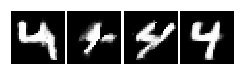

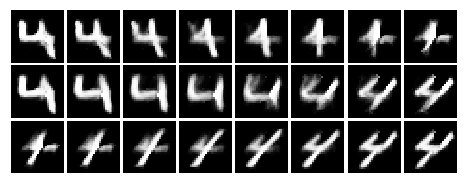

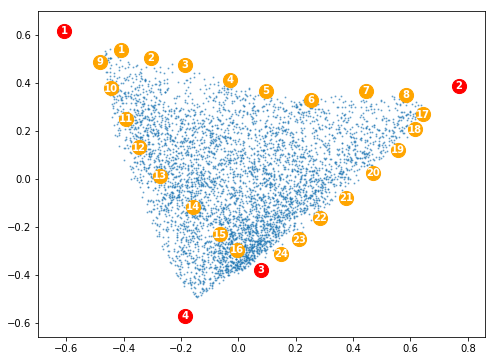

In [202]:
# plot ATs
AAtools.plot_mnist(ats_x)

# samples
data_sample_uniform2 = model.at2data(AT_scan)
AAtools.plot_mnist(data_sample_uniform2, nc=8)

# plot
pca = PCA(n_components=2)
Z_at = np.eye(num_at)
samples_Z = model.data2at(data_sample_uniform)
samples_Z2 = model.data2at(data_sample_uniform2)
Y_pca_z = pca.fit_transform(samples_Z)
Y_pca = pca.transform(Z_at)
Y_pca_z2 = pca.transform(samples_Z2)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca_z[:,0], Y_pca_z[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=200, c='r')
for i in range(Y_pca.shape[0]):
    plt.text(Y_pca[i,0], Y_pca[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})
plt.scatter(Y_pca_z2[:,0], Y_pca_z2[:,1], s=200, c='orange')
for i in range(Y_pca_z2.shape[0]):
    plt.text(Y_pca_z2[i,0], Y_pca_z2[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

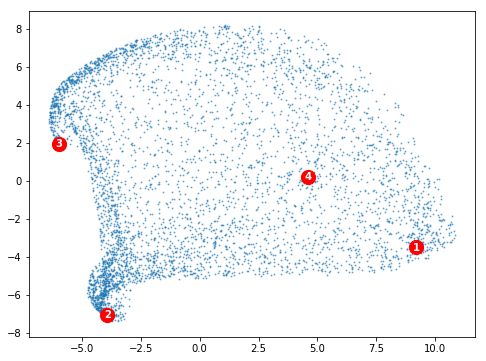

In [203]:
# PCA on generated data

# sample uniform from simplex
at_sample_uniform = model.sample_at_uniform(5000)
data_sample_uniform = model.at2data(at_sample_uniform)

# PCA
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(data_sample_uniform)
Y_pca_at = pca.transform(ats_x)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=200, c='r')
for i in range(Y_pca_at.shape[0]):
    plt.text(Y_pca_at[i,0], Y_pca_at[i,1], i+1, horizontalalignment='center', verticalalignment='center', 
             fontdict={'color': 'white','size':10,'weight':'bold'})

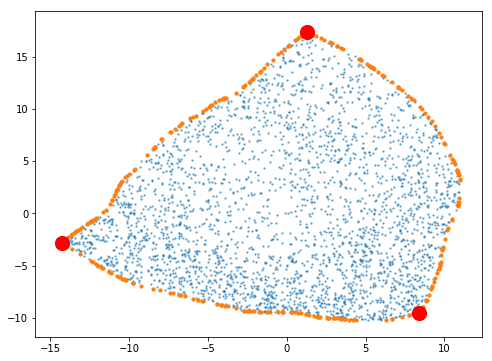

In [115]:
# MDS on generated data
n = 3000
n_boundary = 100

# sample uniform from simplex
at_sample_uniform = model.sample_at_uniform(n)
data_sample_uniform = model.at2data(at_sample_uniform)

# sample from boundary
at_boundary_uniform = sample_boundary_uniform(num_at, n_boundary)
data_boundary_uniform = model.at2data(at_boundary_uniform)
data_boundary_uniform.shape

# concat
data_sample = np.concatenate([data_sample_uniform, data_boundary_uniform, ats_x], axis=0)

# MDS
embedding = MDS(n_components=2)
Y_mds = embedding.fit_transform(data_sample)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds[:n,0], Y_mds[:n,1], s=2, alpha=0.5)
plt.scatter(Y_mds[n:n+n_boundary*num_at,0], Y_mds[n:n+n_boundary*num_at,1], s=10, alpha=1)
plt.scatter(Y_mds[n+n_boundary*num_at:,0], Y_mds[n+n_boundary*num_at:,1], s=200, alpha=1, c='r')
plt.show()

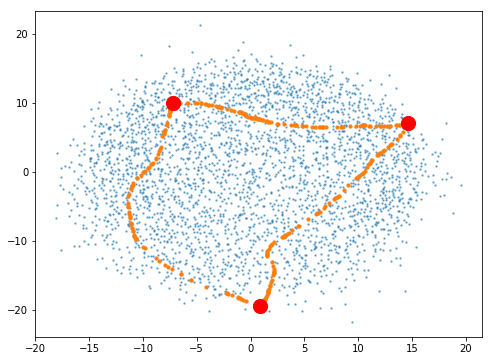

In [119]:
# MDS on input data
n = 3000
n_boundary = 100

# sample from boundary
at_boundary_uniform = sample_boundary_uniform(num_at, n_boundary)
data_boundary_uniform = model.at2data(at_boundary_uniform)
data_boundary_uniform.shape

# concat
data_sample = np.concatenate([data[:n,], data_boundary_uniform, ats_x], axis=0)

# MDS
embedding = MDS(n_components=2)
Y_mds = embedding.fit_transform(data_sample)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds[:n,0], Y_mds[:n,1], s=2, alpha=0.5)
plt.scatter(Y_mds[n:n+n_boundary*num_at,0], Y_mds[n:n+n_boundary*num_at,1], s=10, alpha=1)
plt.scatter(Y_mds[n+n_boundary*num_at:,0], Y_mds[n+n_boundary*num_at:,1], s=200, alpha=1, c='r')
plt.show()

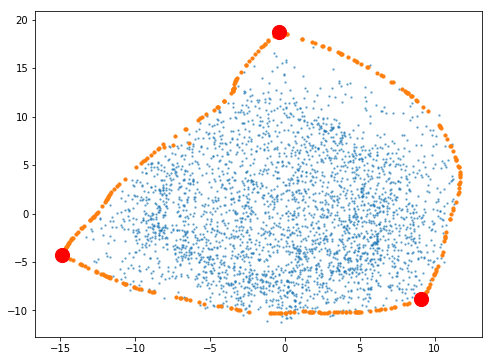

In [123]:
# MDS on input data
n = 3000
n_boundary = 100

# data
data_recon = model.at2data(model.data2at(data))

# sample from boundary
at_boundary_uniform = sample_boundary_uniform(num_at, n_boundary)
data_boundary_uniform = model.at2data(at_boundary_uniform)
data_boundary_uniform.shape

# concat
data_sample = np.concatenate([data_recon[:n,], data_boundary_uniform, ats_x], axis=0)

# MDS
embedding = MDS(n_components=2)
Y_mds = embedding.fit_transform(data_sample)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds[:n,0], Y_mds[:n,1], s=2, alpha=0.5)
plt.scatter(Y_mds[n:n+n_boundary*num_at,0], Y_mds[n:n+n_boundary*num_at,1], s=10, alpha=1)
plt.scatter(Y_mds[n+n_boundary*num_at:,0], Y_mds[n+n_boundary*num_at:,1], s=200, alpha=1, c='r')
plt.show()

In [104]:
def sample_boundary_uniform(num_at, n):
    x_all = []
    for i in range(num_at):
        x = sample_at_uniform(num_at-1, n)
        x = np.insert(x, i, 0, axis=1)
        x_all.append(x)
    return np.concatenate(x_all, axis=0)

In [105]:
def sample_at_uniform(num_at, n):
    u = np.random.uniform(0,1,[n,num_at])
    e = -np.log(u)
    x = e / np.sum(e, axis=1, keepdims=True)
    return x

In [ ]:
def sample_at_grid(num_at, n):
    for i in range(num_at):
        x[i] = np.linspace(0, 1, n)
    grid = np.meshgrid(x)

In [122]:
np.meshgrid(x)

In [154]:
n = 10
x = []
for i in range(3):
    x.append(np.linspace(0, 1, n))
#x = np.concatenate(x, axis=1)
grid = np.meshgrid(x)
#grid = np.concatenate(grid, axis=1)

In [158]:
grid

[array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ,
        0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])]

In [ ]:
np.meshgrid

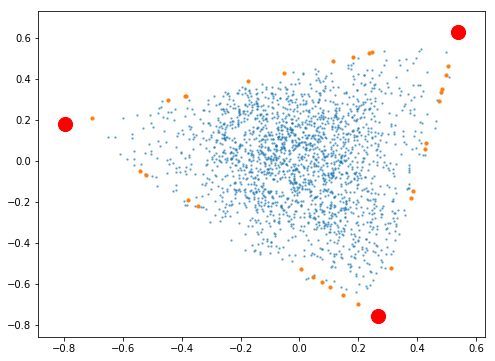

In [160]:
# MDS on z
n = 2000
n_boundary = 100

# data
data_at = model.data2at(data)

# sample from boundary
at_boundary_uniform = sample_boundary_uniform(num_at, n_boundary)

# ats
Z_at = np.eye(num_at)

# concat
data_sample = np.concatenate([data_at[:n,], at_boundary_uniform, Z_at], axis=0)

# MDS
embedding = MDS(n_components=2)
Y_mds = embedding.fit_transform(data_sample)
fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds[:n,0], Y_mds[:n,1], s=2, alpha=0.5)
plt.scatter(Y_mds[n:n+n_boundary*num_at,0], Y_mds[n:n+n_boundary*num_at,1], s=10, alpha=1)
plt.scatter(Y_mds[n+n_boundary*num_at:,0], Y_mds[n+n_boundary*num_at:,1], s=200, alpha=1, c='r')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


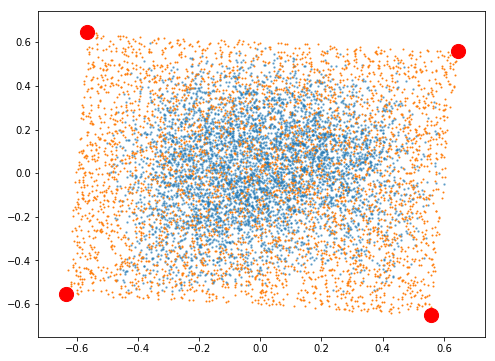

In [228]:
# MDS on z
n = 2000
n_boundary = 1000

# MDS
embedding = MDS(n_components=2)
Y_mds = embedding.fit_transform(Z_at)

# data
data_at = model.data2at(data)
Y_mds_data = data_at @ Y_mds

# sample from boundary
boundary_at = sample_boundary_uniform(num_at, n_boundary)
Y_mds_boundary = boundary_at @ Y_mds

fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds_data[:,0], Y_mds_data[:,1], s=2, alpha=0.5)
plt.scatter(Y_mds_boundary[:,0], Y_mds_boundary[:,1], s=1, alpha=1)
plt.scatter(Y_mds[:,0], Y_mds[:,1], s=200, alpha=1, c='r')
plt.show()